Dados carregados com sucesso do arquivo 01-01-2021.csv!
Número de linhas carregadas: 4011
Número de linhas após filtro para US: 3276
Precisão do modelo: 0.50
Previsão de mortes para 100000 casos confirmados e 80000 recuperados: 1540.93


c:\Users\danie\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


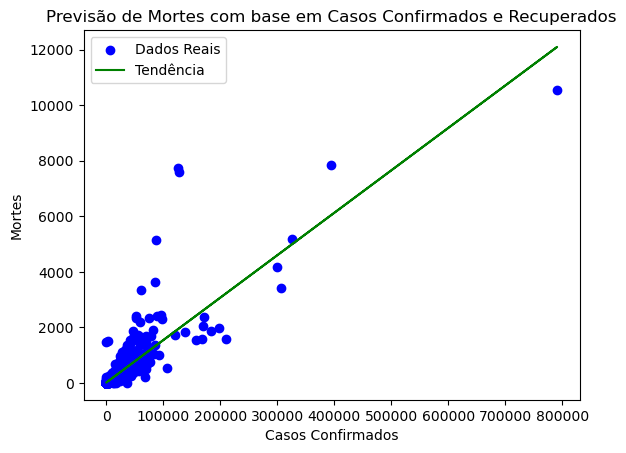

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import dump, load

class Robo:
    def __init__(self):
        self.model = LinearRegression()

    def carregar_dados_csv(self, arquivo_csv):
        """
        Carrega os dados de um arquivo CSV.
        """
        self.dados = pd.read_csv(arquivo_csv)
        print(f"Dados carregados com sucesso do arquivo {arquivo_csv}!")
        print(f"Número de linhas carregadas: {len(self.dados)}")

    def filtrar_dados_por_pais(self, pais):
        """
        Filtra os dados pelo país.
        """
        self.dados_filtrados = self.dados[self.dados['Country_Region'] == pais]
        print(f"Número de linhas após filtro para {pais}: {len(self.dados_filtrados)}")

    def preparar_e_treinar_modelo(self):
        """
        Prepara os dados para o modelo de regressão linear.
        """
        # Variáveis de entrada
        X = self.dados_filtrados[['Confirmed', 'Recovered']].fillna(0).values
        
        # Variável dependente
        y = self.dados_filtrados['Deaths'].fillna(0).values

        # Dividir os dados em conjunto
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Treinar o modelo
        self.model.fit(X_train, y_train)

        # Avaliar o modelo
        score = self.model.score(X_test, y_test)
        print(f"Precisão do modelo: {score:.2f}")

    def prever_futuro(self, casos_confirmados, recuperados):
        """
        faz previsões futuras com base nos casos confirmados e recuperados.
        """
        X_futuro = np.array([[casos_confirmados, recuperados]])
        previsao = self.model.predict(X_futuro)
        return previsao[0]

    def exibir_grafico(self):
        """
        gera e exibe o gráfico dos dados reais e a tendência.
        """
        plt.scatter(self.dados_filtrados['Confirmed'], self.dados_filtrados['Deaths'], color='blue', label='Dados Reais')  
        plt.plot(self.dados_filtrados['Confirmed'], self.model.predict(self.dados_filtrados[['Confirmed', 'Recovered']].fillna(0)), color='green', label='Tendência')
        plt.xlabel('Casos Confirmados')
        plt.ylabel('Mortes')
        plt.title('Previsão de Mortes com base em Casos Confirmados e Recuperados')
        plt.legend()
        plt.show()
 
    #ex
if __name__ == "__main__": 
    # criando instância do robô
    robo = Robo()
    
    # carregando os dados do arquivo CSV
    robo.carregar_dados_csv('01-01-2021.csv') 

    # por país específico
    robo.filtrar_dados_por_pais("US")
    robo.preparar_e_treinar_modelo()

    # previsão para um exemplo de casos confirmados e recuperados
    casos_confirmados = 100000  #ex
    recuperados = 80000         #ex
    previsao = robo.prever_futuro(casos_confirmados, recuperados)
    print(f"Previsão de mortes para {casos_confirmados} casos confirmados e {recuperados} recuperados: {previsao:.2f}")

    robo.exibir_grafico()
